In [1]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data
df = pd.read_csv('../resources/clean_extended_data.csv')

### Removing Unnecessary Columns
Before performing feature selection, you should remove any columns that are not relevant to the prediction. This includes identifying columns (such as player ID, name, team), columns that have leaked information about the target variable, or any categorical columns that you do not plan to use.

In [3]:
# Removing columns that are not needed
columns_to_drop = ['IDfg', 'Name', 'Team', 'Season']
df_cleaned = df.drop(columns=columns_to_drop)

# Remove any categorical column not already converted to numeric format
df_cleaned = df_cleaned.select_dtypes(include=[np.number])


In [4]:
X = df_cleaned.drop('H', axis=1)  
y = df_cleaned['H']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
print(X_train.dtypes)

Age                   int64
G                     int64
AB                    int64
PA                    int64
1B                    int64
                     ...   
L-WAR               float64
competitive_runs    float64
bolts               float64
hp_to_1b            float64
sprint_speed        float64
Length: 258, dtype: object


In [6]:
# Counting NaN values in each column
nan_counts = X_train.isna().sum()

# Showing columns with NaN values
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)



Series([], dtype: int64)


In [7]:
X_train

,Age,G,AB,PA,1B,2B,3B,HR,R,RBI,...,HardHit,HardHit%,Events,CStr%,CSW%,L-WAR,competitive_runs,bolts,hp_to_1b,sprint_speed
128,31,155,584,645,128,27,5,15,86,49,...,171,0.352,486,0.150,0.239,5.0,257.0,37.0,4.25,28.700000
340,28,149,492,566,75,25,0,35,80,108,...,153,0.426,359,0.183,0.307,3.0,130.0,0.0,4.42,27.028361
1592,29,26,63,74,11,3,1,0,8,1,...,11,0.229,48,0.205,0.320,0.1,25.0,0.0,4.42,27.200000
596,26,139,524,550,125,21,2,12,62,51,...,89,0.185,480,0.129,0.208,2.1,253.0,0.0,4.33,26.900000
993,31,69,230,263,28,14,0,9,35,30,...,66,0.349,189,0.150,0.216,1.1,78.0,0.0,4.50,26.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,34,149,544,636,99,20,1,22,96,78,...,156,0.373,418,0.181,0.270,0.3,212.0,0.0,4.44,26.200000
1095,30,31,65,70,12,2,1,2,7,7,...,14,0.368,38,0.200,0.367,0.7,130.0,0.0,4.42,27.028361
1130,36,152,593,650,109,19,0,31,71,119,...,231,0.441,524,0.178,0.243,1.0,225.0,0.0,5.02,22.600000
1294,27,125,415,458,46,17,0,14,50,42,...,91,0.326,279,0.183,0.294,0.4,122.0,0.0,4.45,27.400000


In [8]:
selector = SelectKBest(f_classif, k='all')  
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Displaying the choosen features
selected_features = X_train.columns[selector.get_support()]
print("Featured Features:", selected_features)


Odabrane karakteristike: Index(['Age', 'G', 'AB', 'PA', '1B', '2B', '3B', 'HR', 'R', 'RBI',
       ...
       'HardHit', 'HardHit%', 'Events', 'CStr%', 'CSW%', 'L-WAR',
       'competitive_runs', 'bolts', 'hp_to_1b', 'sprint_speed'],
      dtype='object', length=258)


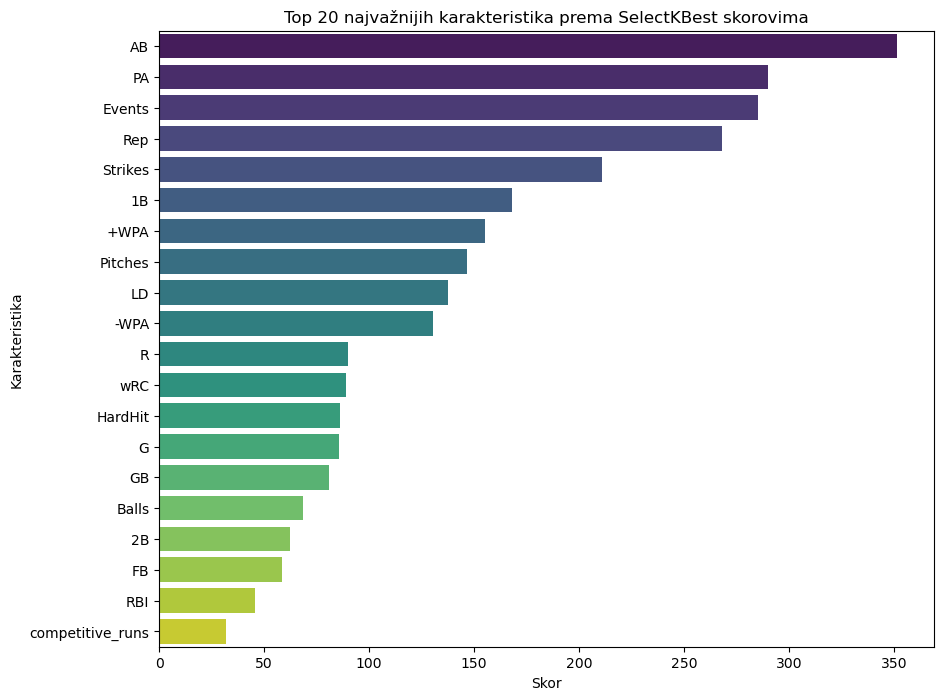

In [9]:
# Geting the scores of the features
feature_scores = selector.scores_

features_scores_df = pd.DataFrame({'Feature': X_train.columns, 'Score': feature_scores})


features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)


top_n = 20
top_features_scores_df = features_scores_df.head(top_n)


plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=top_features_scores_df, palette='viridis')
plt.title(f'Top {top_n} najvažnijih karakteristika prema SelectKBest skorovima')
plt.xlabel('Skor')
plt.ylabel('Karakteristika')

plt.show()

In [10]:

top_n = 50
top_features_scores_df = features_scores_df.head(top_n)
top_features_scores_df


,Feature,Score
2,AB,351.382945
3,PA,289.881921
250,Events,285.231118
51,Rep,268.172658
26,Strikes,210.709105
4,1B,167.783063
59,+WPA,155.158100
24,Pitches,146.730031
22,LD,137.437314
58,-WPA,130.593809


In [11]:
# # What features should be excluded from the analysis
features_to_exclude = ['AB', 'PA', '1B', '2B', '3B', 'HR', 'AVG', 'SLG', 'OBP','AVG+','SLG+','wFA/C','wRC', 'wOBA','G','Lg','OBP+','wRC+','OPS','wFA/C','wFB/C','wFA/C (sc)']

# Filter out the features to exclude
filtered_features_scores_df = top_features_scores_df[~top_features_scores_df['Feature'].isin(features_to_exclude)]

# You can add additional features to the features_to_exclude list
# if you identify others that directly depend on the number of hits or include them in the calculation


In [12]:
top_features = filtered_features_scores_df['Feature'].values  # Ažurirajte ovo prema vašem kodu

results = []

n_iterations = 20
n_features = 10

for _ in range(n_iterations):
    # Random selection of 10 features
    selected_features = np.random.choice(top_features, size=n_features, replace=False)
    
    # Prepare the data
    X_selected = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluation of the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Save the results
    results.append({
        'Selected_Features': ', '.join(selected_features),
        'R2_Score': r2,
        'MSE': mse,
        'RMSE': rmse
    })

# Data frame with the results
results_df = pd.DataFrame(results)

# Soring the results
sorted_results_df = results_df.sort_values(by='R2_Score', ascending=False)

# Display the top results
print(sorted_results_df.head())

                                    Selected_Features  R2_Score        MSE  \
3   WPA/LI, R, IFFB, Events, CSW%, GDP, FB, wRAA, ...  0.985683  39.056873   
14  CSW%, Balls, Pitches, R, FB, IFFB, Rep, Strike...  0.984309  42.806673   
2   Barrels, Events, SF, Rep, WPA/LI, R, L-WAR, IF...  0.983310  45.532422   
19  SF, Events, FB, RBI, RE24, GDP, -WPA, competit...  0.981188  51.321479   
12  GB, IFFB, WAR, SF, WPA/LI, Events, CSW%, Barre...  0.980496  53.207251   

        RMSE  
3   6.249550  
14  6.542681  
2   6.747772  
19  7.163901  
12  7.294330  


In [13]:
# Make list  included columns SO, CSW%, LD, Events, wRAA, Barrels, RBI, IFFB, R, competitive_runs, 
feature_list = ['SO', 'CSW%', 'LD', 'Events', 'wRAA', 'Barrels', 'RBI', 'IFFB', 'R', 'competitive_runs']



